<a href="https://colab.research.google.com/github/Qcritt/cosc470s24/blob/main/Cifar10_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# example of loading the cifar10 dataset
from keras.datasets.cifar10 import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

170498071/170498071 [==============================] - 4s 0us/step
Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


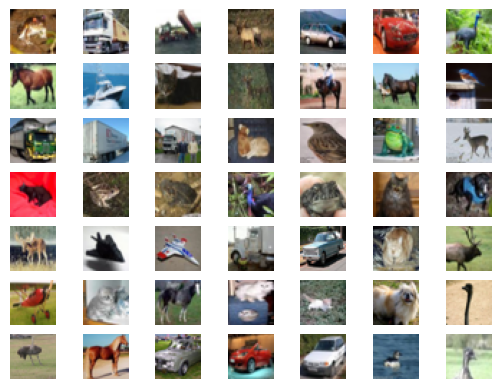

In [41]:
# example of loading and plotting the cifar10 dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot as plt
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(49):
	# define subplot
	pyplot.subplot(7, 7, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i])
pyplot.show()

In [45]:
# example of training the discriminator model on real and random cifar10 images
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.datasets.cifar100 import load_data as load_data100
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU

# define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	# normal
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# load and prepare cifar10 training images
def load_real_samples(loadfunc):
	# load cifar10 dataset
	(trainX, _), (_, _) = loadfunc()
	# convert from unsigned ints to floats
	X = trainX.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return X

# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(32 * 32 * 3 * n_samples)
	# update to have the range [-1, 1]
	X = -1 + X * 2
	# reshape into a batch of color images
	X = X.reshape((n_samples, 32, 32, 3))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

# train the discriminator model
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples(load_data)
# fit the model
train_discriminator(model, dataset10)

>1 real=36% fake=0%
>2 real=92% fake=8%
>3 real=95% fake=62%
>4 real=98% fake=100%
>5 real=100% fake=100%
>6 real=98% fake=100%
>7 real=100% fake=100%
>8 real=98% fake=100%
>9 real=100% fake=100%
>10 real=100% fake=100%
>11 real=100% fake=100%
>12 real=100% fake=100%
>13 real=100% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=100% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=98% fake=100%


In [26]:
import numpy as np
a_real = model.predict(np.array([dataset[0], dataset[37476]]))
print(a_real)
a_fake = model.predict(fake_samples[0])
print(a_fake)

1/1 [==============================] - 0s 160ms/step
[[0.9999999]
 [1.       ]]
1/1 [==============================] - 0s 43ms/step
[[0.00014758]
 [0.00013539]]


(50000, 32, 32, 3)
1/1 [==============================] - 0s 29ms/step


[[1.        ]
 [0.99999976]]


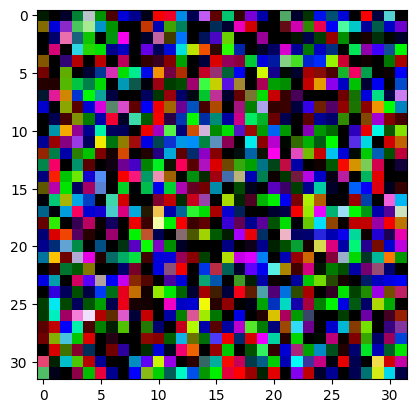

In [38]:
# how well does it recognize images from the cifar-100 dataset, when it was onnly trained on cifar-10
dataset100 = load_real_samples(load_data_100)
print(dataset100.shape)
a_real100 = model.predict(np.array([dataset100[7500], dataset100[23000]]))
print(a_real100)
pyplot.imshow(dataset100[7500])
pyplot.imshow(fake_samples[0][0])
pyplot.imshow(fake_samples[0][1])


2/2 [==============================] - 1s 180ms/step


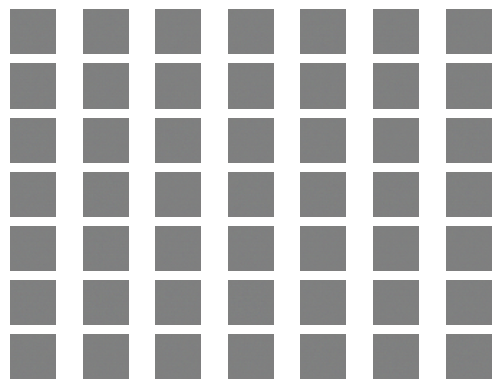

In [46]:
# example of defining and using the generator model
from numpy import zeros
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from matplotlib import pyplot

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 4x4 image
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	# upsample to 8x8
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 32x32
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# output layer
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# scale pixel values from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the generated samples
for i in range(n_samples):
	# define subplot
	pyplot.subplot(7, 7, 1 + i)
	# turn off axis labels
	pyplot.axis('off')
	# plot single image
	pyplot.imshow(X[i])
# show the figure
pyplot.show()

2/2 [==============================] - 0s 195ms/step
>1, 1/390, d1=0.667, d2=0.716 g=0.688


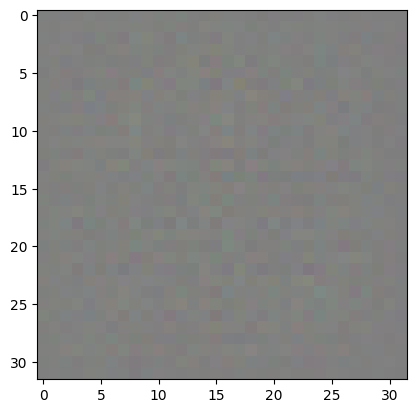

2/2 [==============================] - 0s 203ms/step
>1, 2/390, d1=0.369, d2=0.888 g=0.653


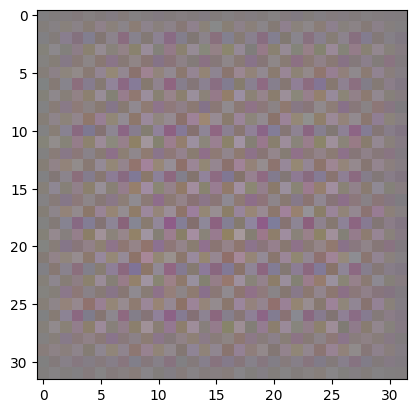

2/2 [==============================] - 0s 208ms/step


>1, 3/390, d1=0.072, d2=0.938 g=0.870


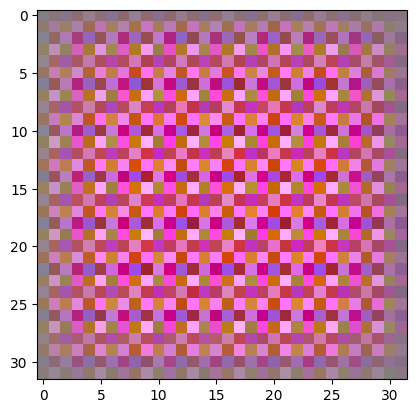

2/2 [==============================] - 1s 351ms/step
>1, 4/390, d1=0.047, d2=0.606 g=0.962


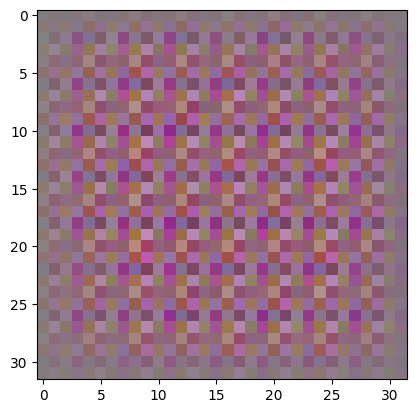

2/2 [==============================] - 0s 198ms/step
>1, 5/390, d1=0.013, d2=0.628 g=0.879


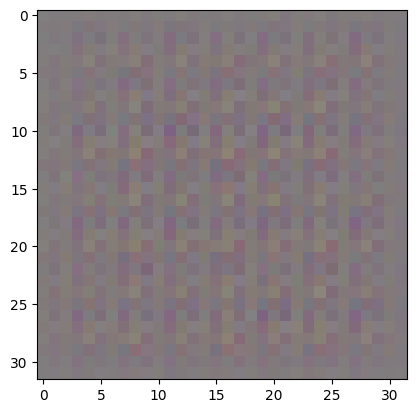

2/2 [==============================] - 0s 200ms/step
>1, 6/390, d1=0.004, d2=0.599 g=1.015


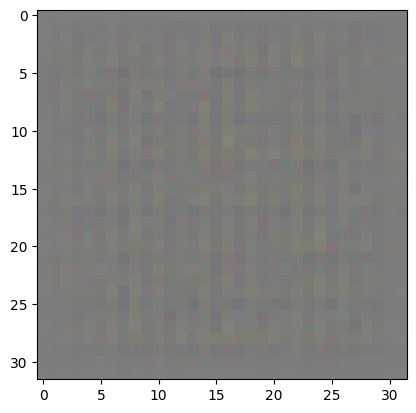

2/2 [==============================] - 0s 197ms/step
>1, 7/390, d1=0.003, d2=0.978 g=1.195


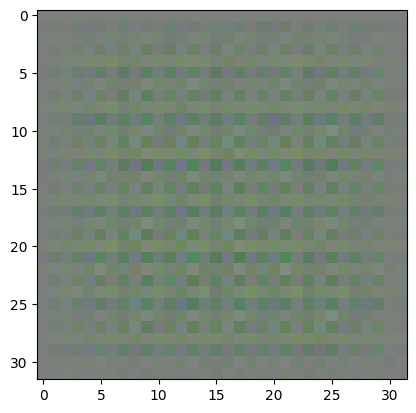

2/2 [==============================] - 0s 199ms/step
>1, 8/390, d1=0.425, d2=1.726 g=0.806


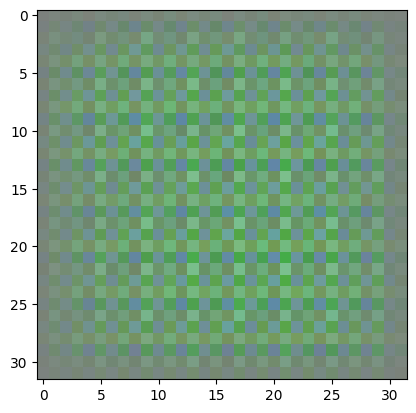

2/2 [==============================] - 1s 325ms/step


>1, 9/390, d1=0.065, d2=0.673 g=1.046


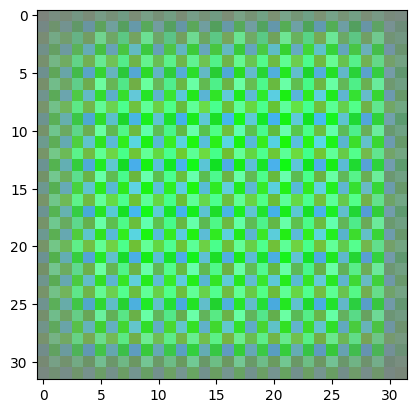

2/2 [==============================] - 0s 196ms/step


>1, 10/390, d1=0.253, d2=0.447 g=1.645


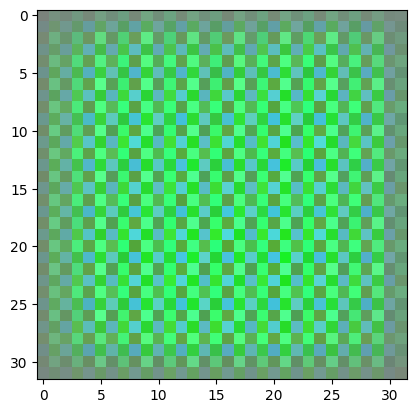

2/2 [==============================] - 0s 201ms/step
>1, 11/390, d1=0.072, d2=0.375 g=1.620


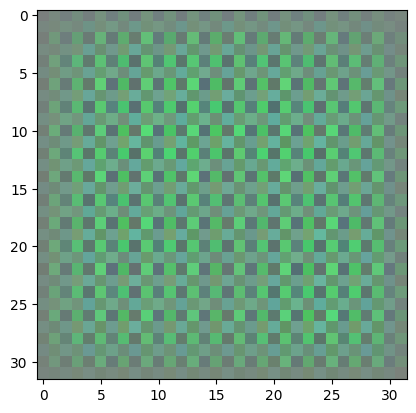

2/2 [==============================] - 0s 212ms/step
>1, 12/390, d1=0.011, d2=0.344 g=1.642


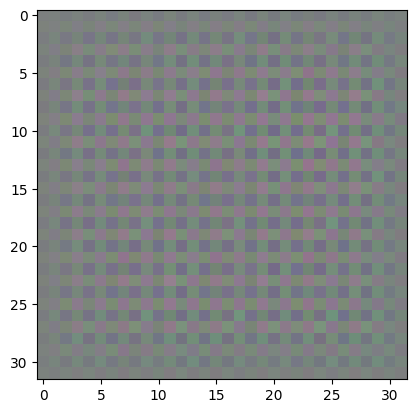

2/2 [==============================] - 0s 200ms/step
>1, 13/390, d1=0.004, d2=0.498 g=2.507


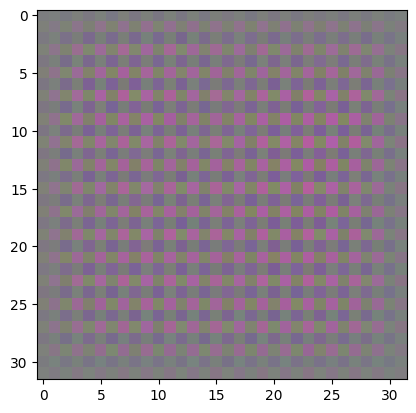

2/2 [==============================] - 0s 198ms/step


>1, 14/390, d1=0.003, d2=0.735 g=7.729


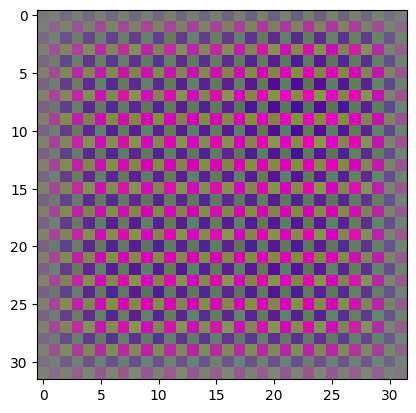

2/2 [==============================] - 0s 206ms/step
>1, 15/390, d1=0.090, d2=0.017 g=4.904


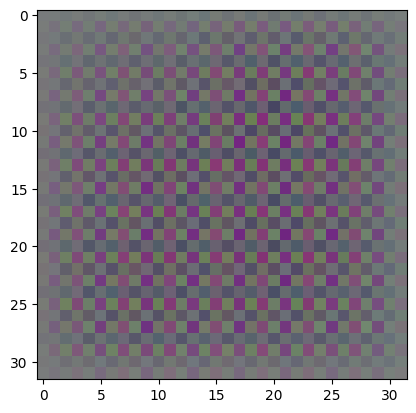

2/2 [==============================] - 0s 206ms/step
>1, 16/390, d1=0.121, d2=0.098 g=3.131


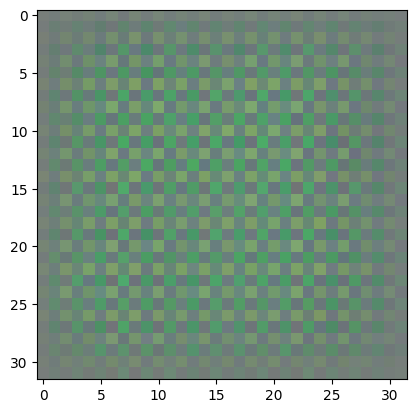

2/2 [==============================] - 1s 318ms/step


>1, 17/390, d1=0.019, d2=4.077 g=4.015


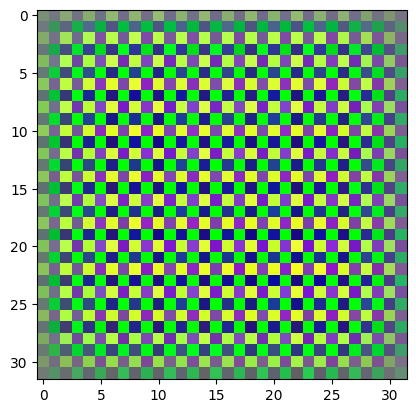

2/2 [==============================] - 0s 202ms/step


>1, 18/390, d1=0.724, d2=0.218 g=2.938


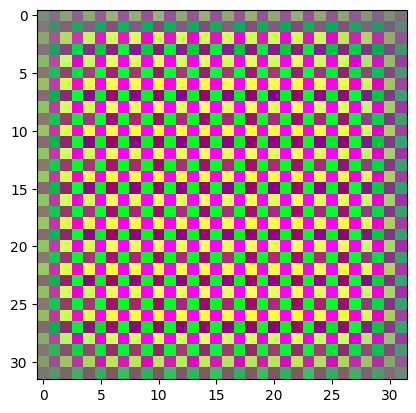

2/2 [==============================] - 0s 209ms/step


>1, 19/390, d1=0.219, d2=0.347 g=6.609


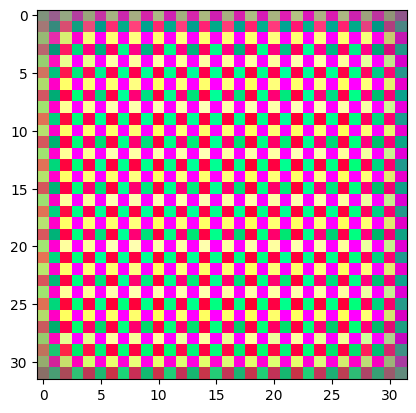

2/2 [==============================] - 1s 304ms/step


>1, 20/390, d1=0.195, d2=0.033 g=4.617


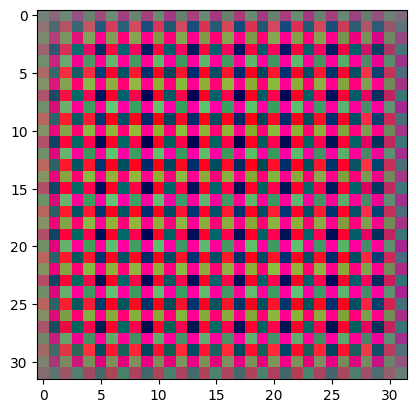

2/2 [==============================] - 0s 205ms/step


>1, 21/390, d1=0.168, d2=0.786 g=2.189


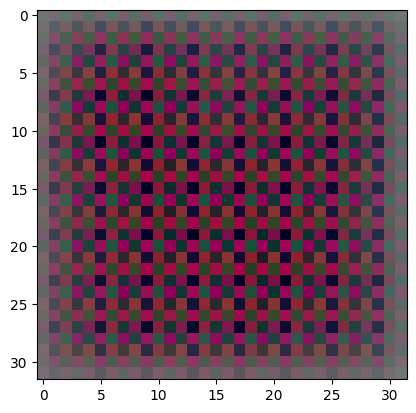

2/2 [==============================] - 0s 197ms/step


>1, 22/390, d1=0.118, d2=0.161 g=3.783


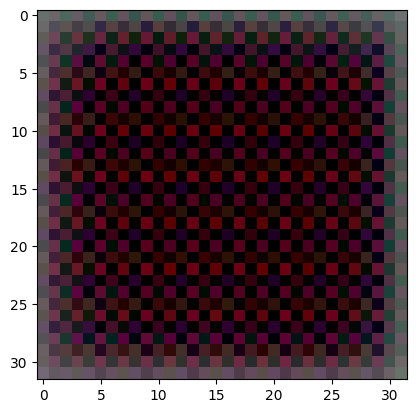

2/2 [==============================] - 0s 210ms/step
>1, 23/390, d1=0.348, d2=0.236 g=2.217


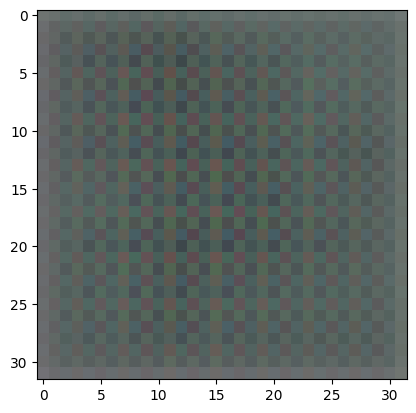

2/2 [==============================] - 0s 204ms/step
>1, 24/390, d1=0.376, d2=0.408 g=2.288


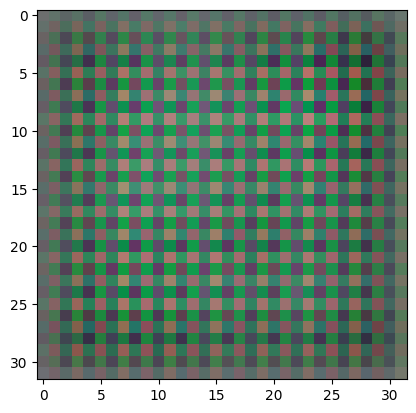

2/2 [==============================] - 1s 321ms/step


>1, 25/390, d1=0.173, d2=0.612 g=4.168


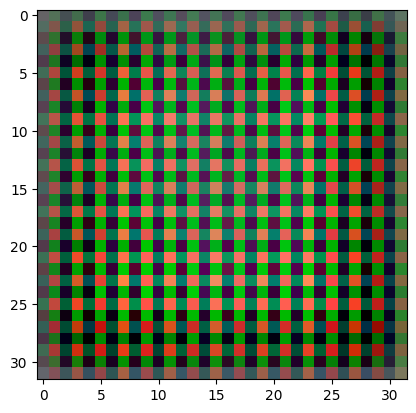

2/2 [==============================] - 0s 206ms/step


>1, 26/390, d1=0.249, d2=0.110 g=4.922


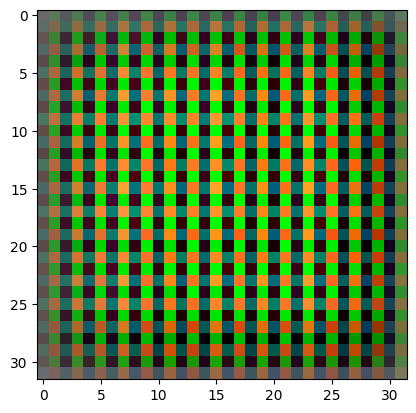

2/2 [==============================] - 0s 198ms/step


>1, 27/390, d1=0.166, d2=0.863 g=10.700


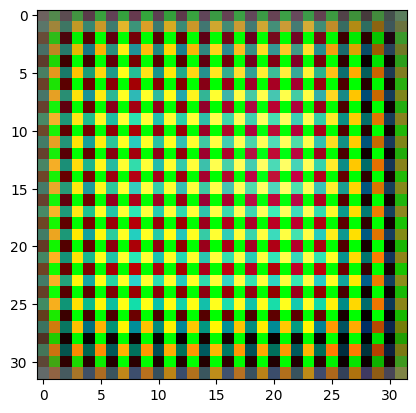

2/2 [==============================] - 0s 207ms/step


>1, 28/390, d1=0.602, d2=0.012 g=8.407


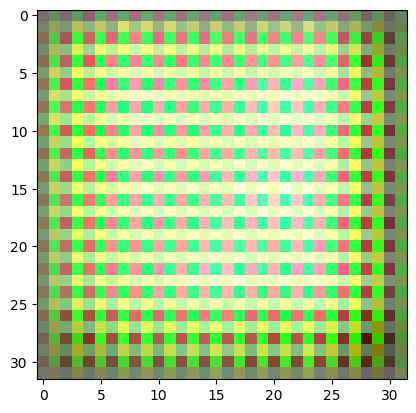

2/2 [==============================] - 0s 202ms/step


>1, 29/390, d1=0.240, d2=13.567 g=15.632


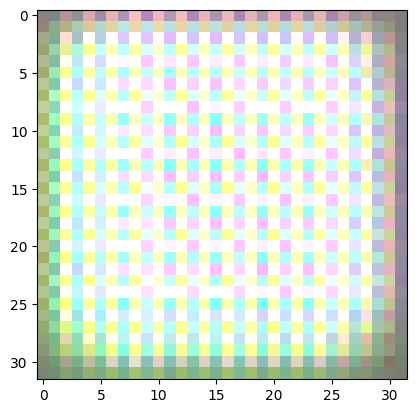

2/2 [==============================] - 1s 307ms/step


>1, 30/390, d1=2.581, d2=0.338 g=2.111


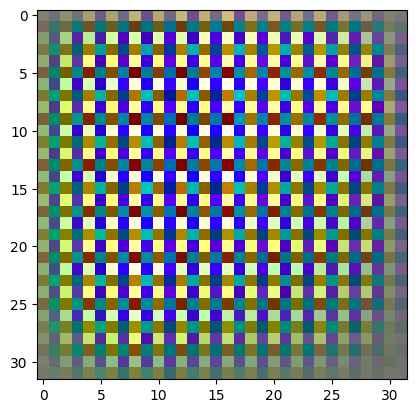

2/2 [==============================] - 0s 204ms/step


>1, 31/390, d1=0.506, d2=0.551 g=2.259


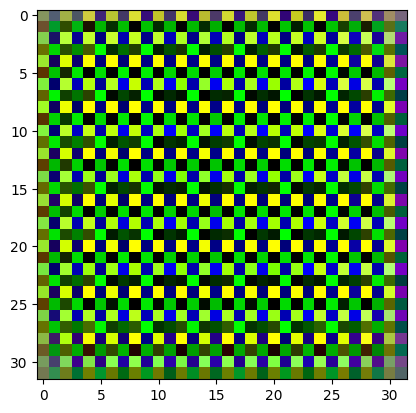

2/2 [==============================] - 0s 195ms/step


>1, 32/390, d1=0.464, d2=0.290 g=2.078


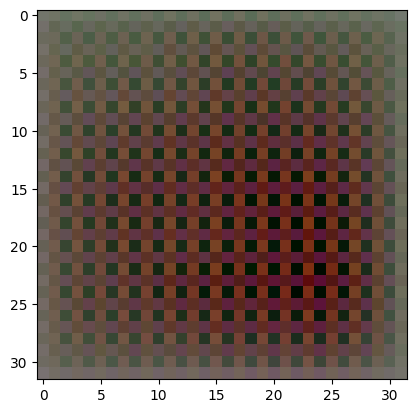

2/2 [==============================] - 1s 215ms/step


>1, 33/390, d1=0.372, d2=0.313 g=2.373


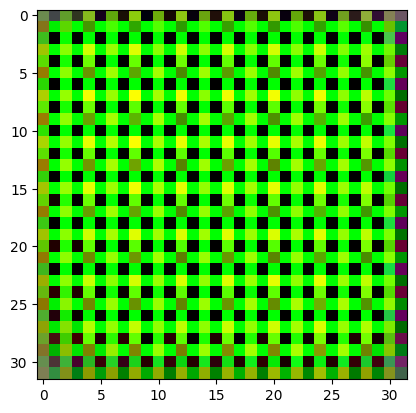

2/2 [==============================] - 0s 215ms/step


>1, 34/390, d1=0.275, d2=0.145 g=3.056


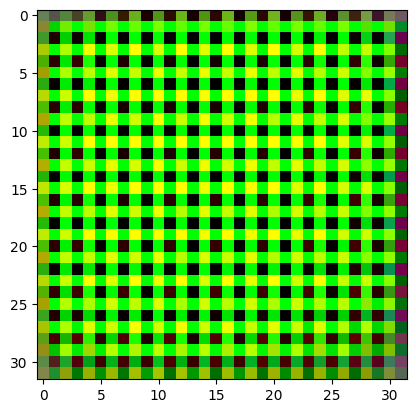

2/2 [==============================] - 0s 205ms/step


>1, 35/390, d1=0.138, d2=0.171 g=3.100


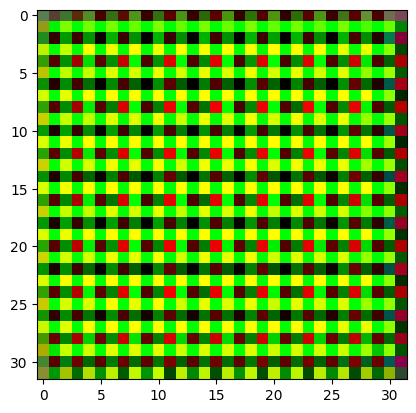

2/2 [==============================] - 0s 221ms/step


>1, 36/390, d1=0.092, d2=0.294 g=4.913


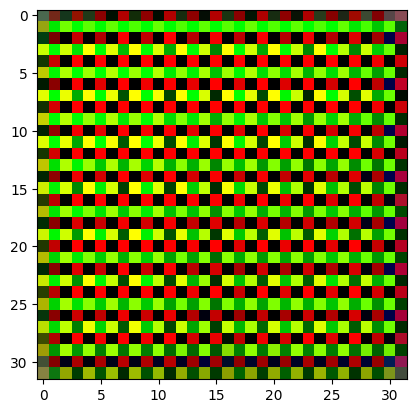

2/2 [==============================] - 0s 214ms/step


>1, 37/390, d1=0.312, d2=0.119 g=4.988


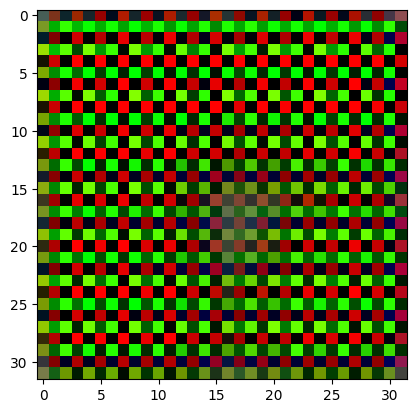

2/2 [==============================] - 1s 378ms/step


>1, 38/390, d1=0.204, d2=0.180 g=3.749


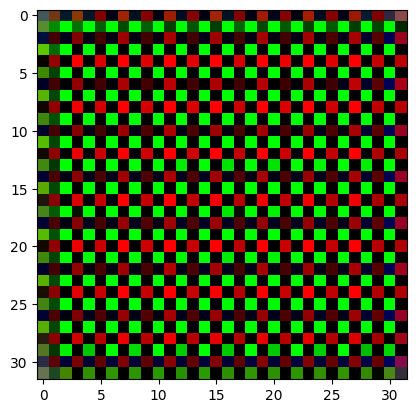

2/2 [==============================] - 1s 492ms/step


>1, 39/390, d1=0.047, d2=1.317 g=8.920


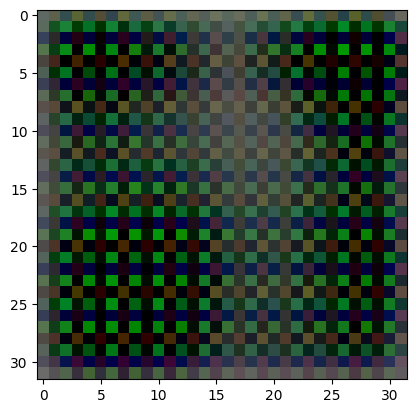

2/2 [==============================] - 1s 267ms/step


>1, 40/390, d1=0.518, d2=0.599 g=6.407


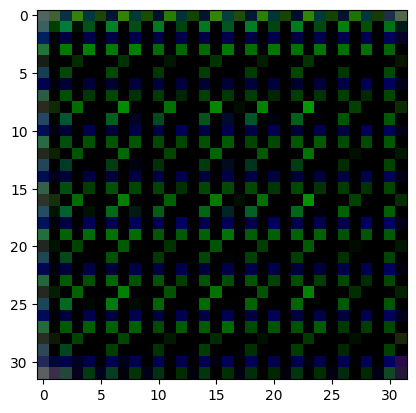

2/2 [==============================] - 1s 341ms/step
>1, 41/390, d1=0.564, d2=0.886 g=1.658


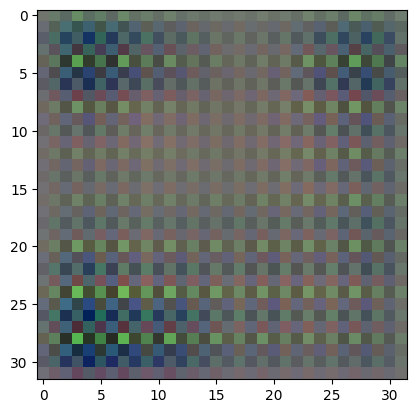

2/2 [==============================] - 1s 321ms/step


>1, 42/390, d1=0.737, d2=2.358 g=1.788


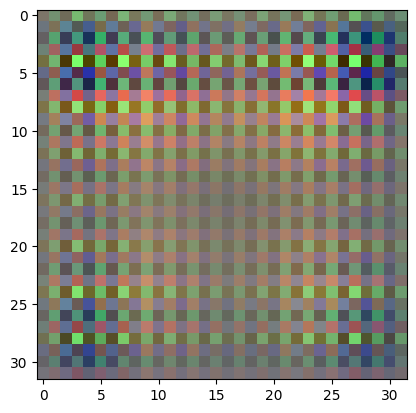

2/2 [==============================] - 0s 281ms/step
>1, 43/390, d1=0.530, d2=0.236 g=2.043


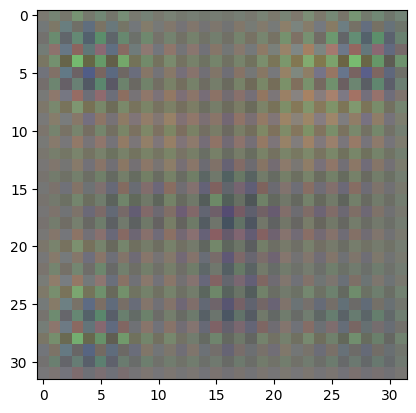

2/2 [==============================] - 1s 212ms/step
>1, 44/390, d1=0.345, d2=0.279 g=1.895


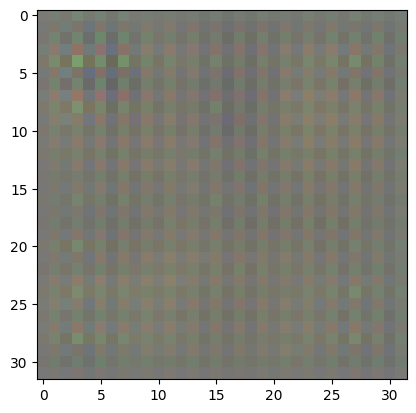

2/2 [==============================] - 1s 359ms/step


>1, 45/390, d1=0.205, d2=0.489 g=2.601


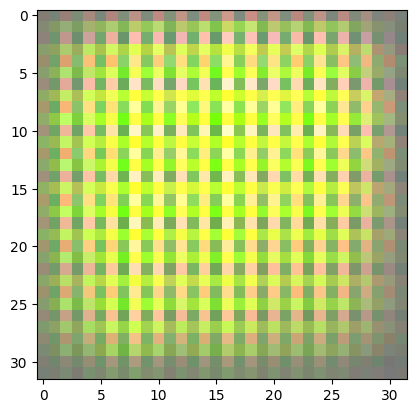

2/2 [==============================] - 1s 315ms/step


>1, 46/390, d1=0.687, d2=0.279 g=2.228


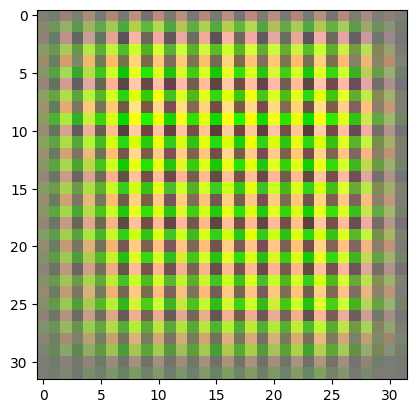

2/2 [==============================] - 0s 208ms/step


>1, 47/390, d1=0.296, d2=0.347 g=3.288


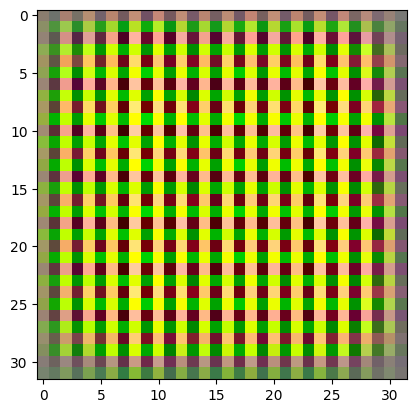

2/2 [==============================] - 0s 205ms/step


>1, 48/390, d1=0.291, d2=0.043 g=3.750


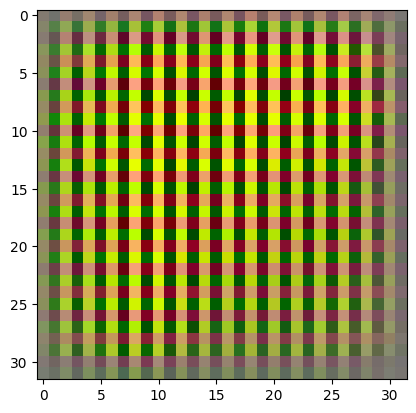

2/2 [==============================] - 0s 210ms/step
>1, 49/390, d1=0.165, d2=0.058 g=3.584


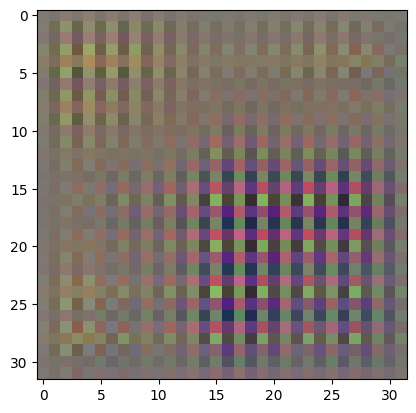

2/2 [==============================] - 0s 212ms/step


>1, 50/390, d1=0.197, d2=0.098 g=2.988


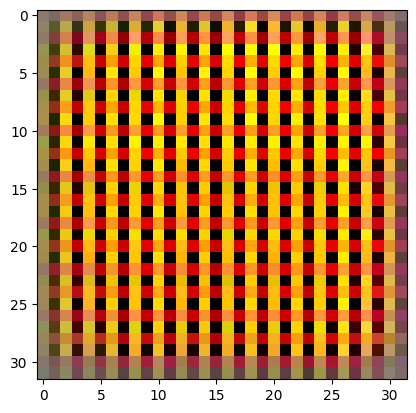

2/2 [==============================] - 0s 206ms/step


>1, 51/390, d1=0.105, d2=0.245 g=3.238


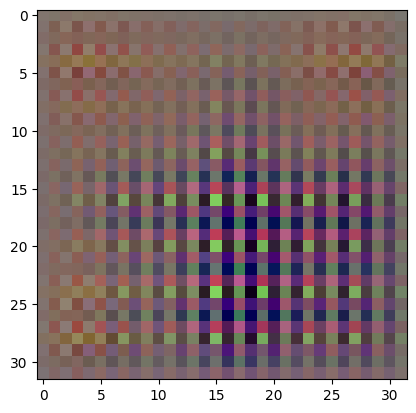

2/2 [==============================] - 1s 545ms/step
>1, 52/390, d1=0.242, d2=0.349 g=2.855


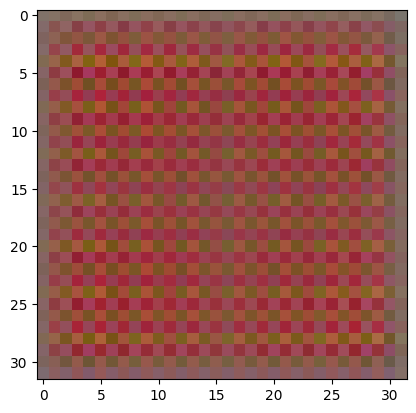

2/2 [==============================] - 0s 221ms/step


>1, 53/390, d1=0.364, d2=0.326 g=2.511


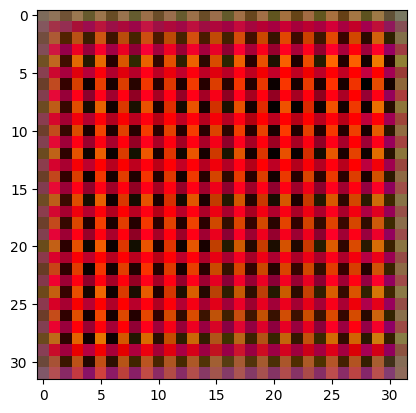

2/2 [==============================] - 0s 212ms/step


>1, 54/390, d1=0.207, d2=0.136 g=3.096


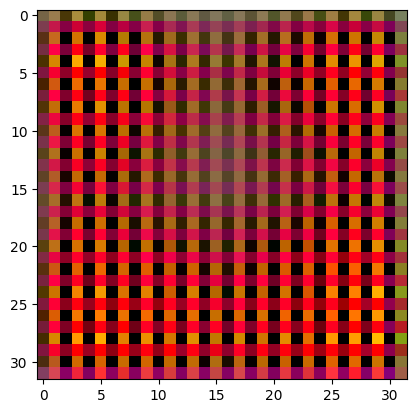

2/2 [==============================] - 1s 372ms/step


>1, 55/390, d1=0.222, d2=0.092 g=3.296


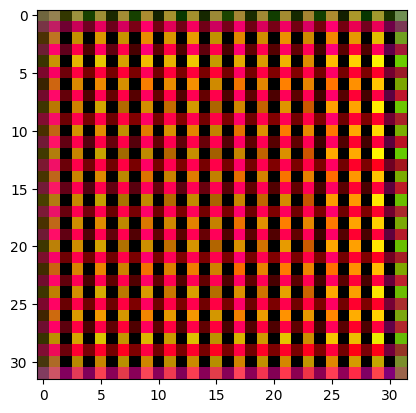

2/2 [==============================] - 1s 293ms/step


>1, 56/390, d1=0.225, d2=0.162 g=3.384


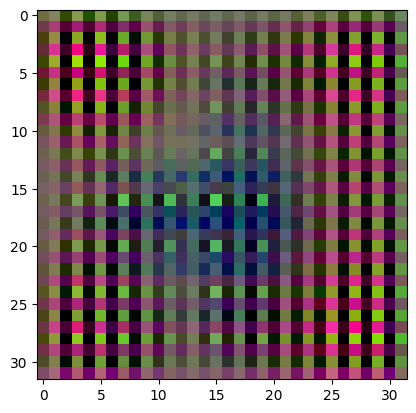

2/2 [==============================] - 1s 326ms/step


>1, 57/390, d1=0.117, d2=0.180 g=3.539


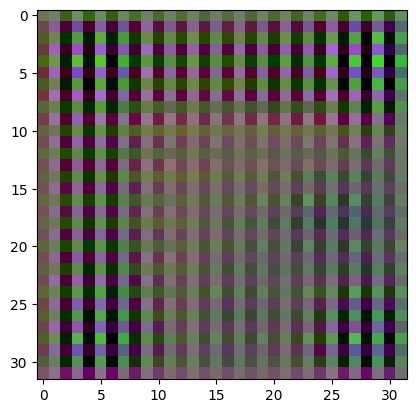

2/2 [==============================] - 1s 260ms/step


>1, 58/390, d1=0.217, d2=0.271 g=3.897


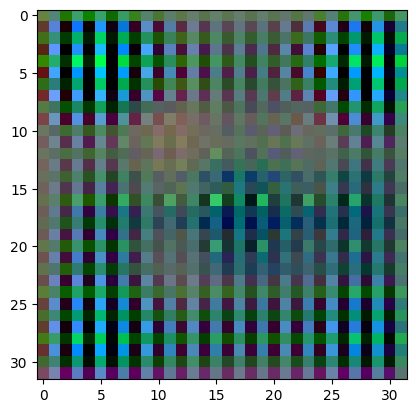

2/2 [==============================] - 1s 298ms/step


>1, 59/390, d1=0.135, d2=0.111 g=4.839


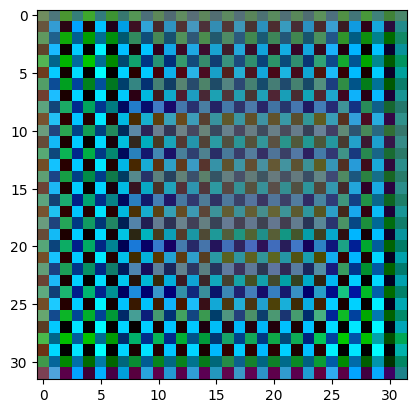

2/2 [==============================] - 1s 299ms/step


>1, 60/390, d1=0.088, d2=0.117 g=5.445


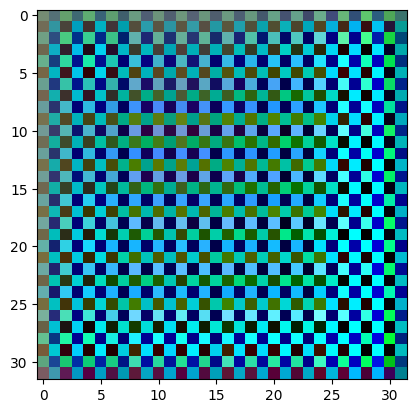

2/2 [==============================] - 0s 202ms/step


>1, 61/390, d1=0.151, d2=0.154 g=4.304


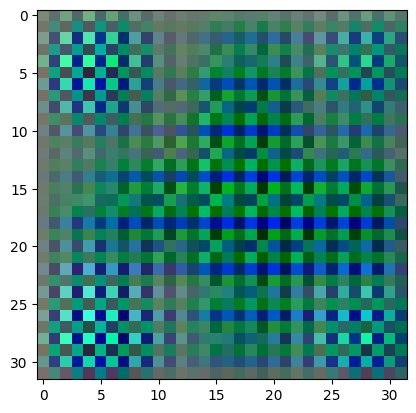

2/2 [==============================] - 0s 227ms/step


>1, 62/390, d1=0.154, d2=0.096 g=4.904


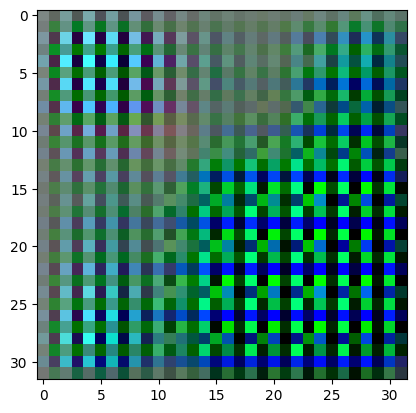

2/2 [==============================] - 0s 210ms/step


>1, 63/390, d1=0.167, d2=0.515 g=9.879


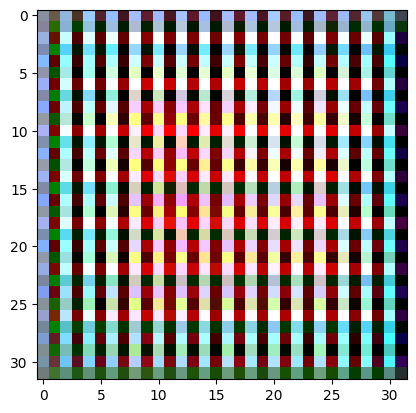

2/2 [==============================] - 0s 215ms/step


>1, 64/390, d1=0.548, d2=0.291 g=4.559


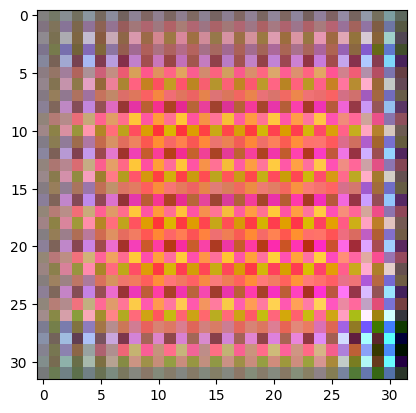

2/2 [==============================] - 1s 297ms/step
>1, 65/390, d1=0.175, d2=0.124 g=3.877


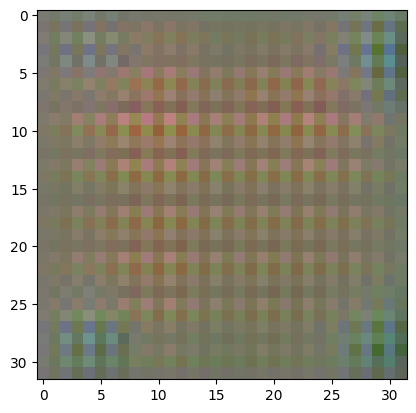

2/2 [==============================] - 0s 219ms/step


>1, 66/390, d1=0.403, d2=0.365 g=2.919


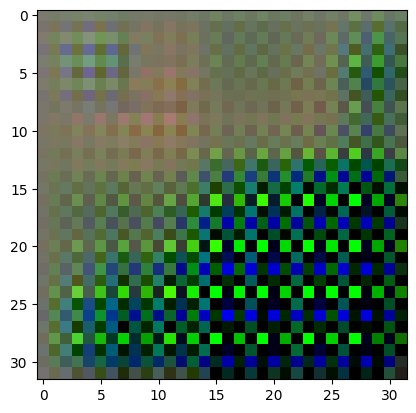

2/2 [==============================] - 0s 209ms/step


>1, 67/390, d1=0.381, d2=0.649 g=3.400


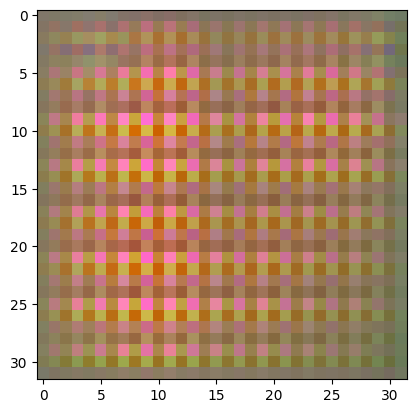

2/2 [==============================] - 1s 338ms/step


>1, 68/390, d1=0.352, d2=0.387 g=3.588


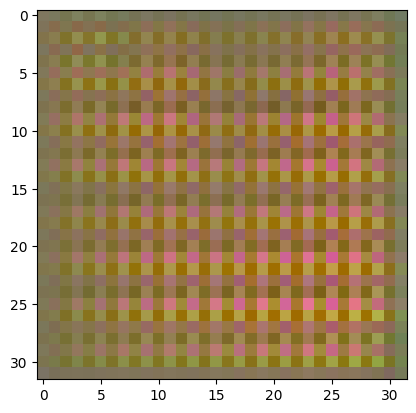

2/2 [==============================] - 0s 235ms/step


>1, 69/390, d1=0.800, d2=0.100 g=2.998


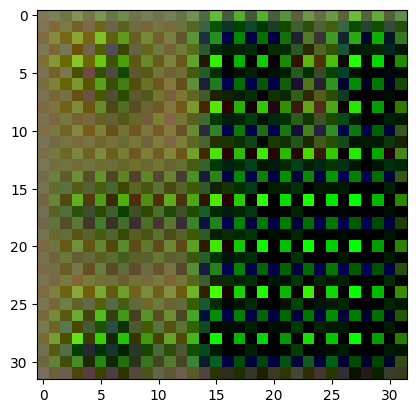

2/2 [==============================] - 0s 206ms/step


>1, 70/390, d1=0.388, d2=0.206 g=2.459


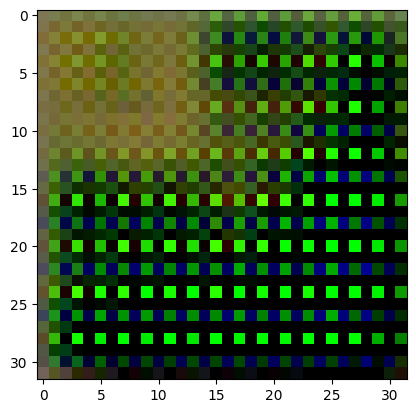

2/2 [==============================] - 0s 209ms/step


>1, 71/390, d1=0.146, d2=0.249 g=3.034


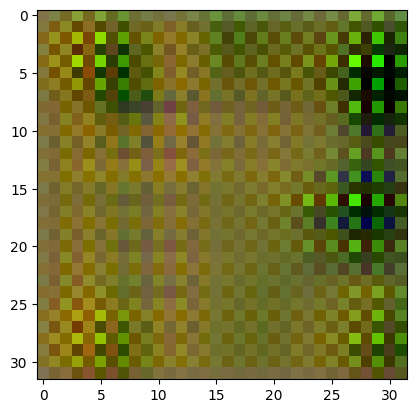

2/2 [==============================] - 0s 208ms/step


>1, 72/390, d1=0.489, d2=0.197 g=3.299


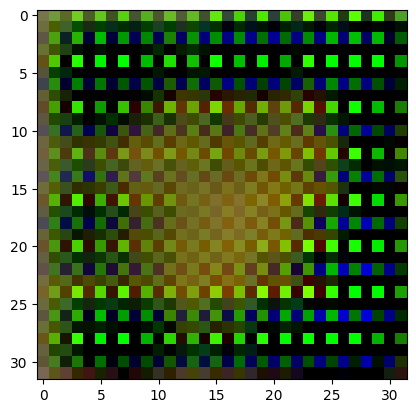

2/2 [==============================] - 1s 870ms/step


>1, 73/390, d1=0.452, d2=0.184 g=3.236


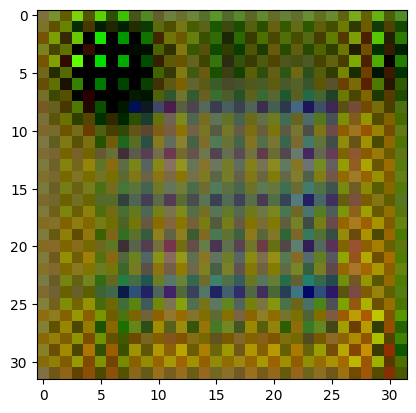

2/2 [==============================] - 0s 208ms/step


>1, 74/390, d1=0.266, d2=0.149 g=4.203


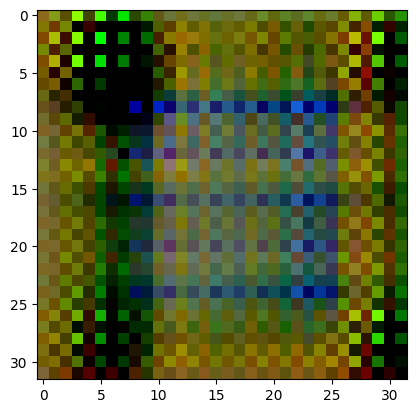

2/2 [==============================] - 0s 215ms/step


>1, 75/390, d1=0.425, d2=0.155 g=3.948


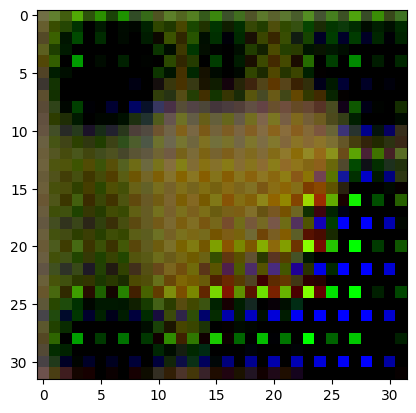

2/2 [==============================] - 1s 311ms/step


>1, 76/390, d1=0.362, d2=0.133 g=4.361


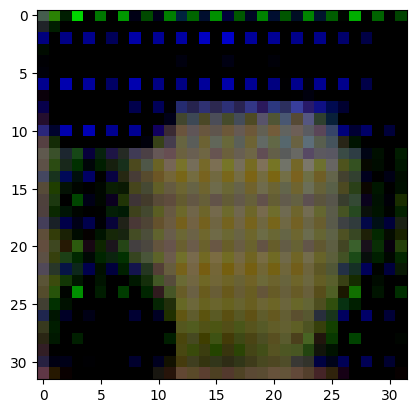

2/2 [==============================] - 0s 211ms/step


>1, 77/390, d1=0.586, d2=0.116 g=3.082


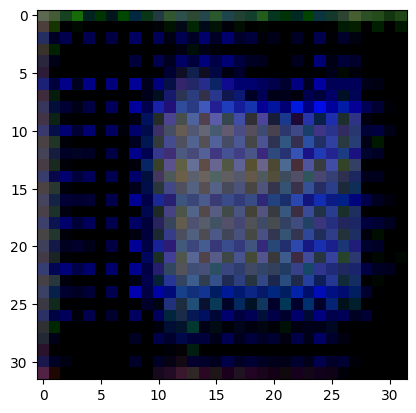

2/2 [==============================] - 0s 201ms/step


>1, 78/390, d1=0.256, d2=0.149 g=3.748


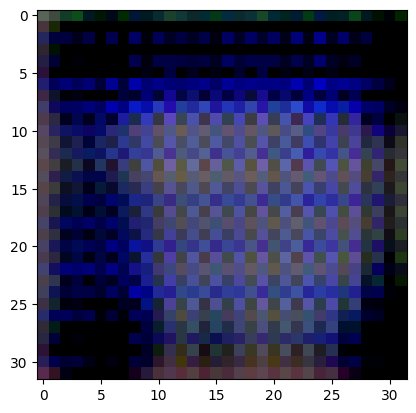

2/2 [==============================] - 0s 212ms/step


>1, 79/390, d1=0.309, d2=0.258 g=3.926


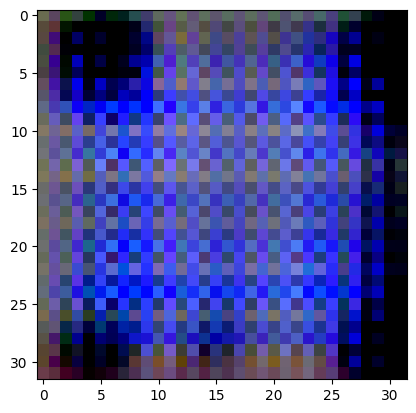

2/2 [==============================] - 0s 221ms/step


>1, 80/390, d1=0.361, d2=2.392 g=5.088


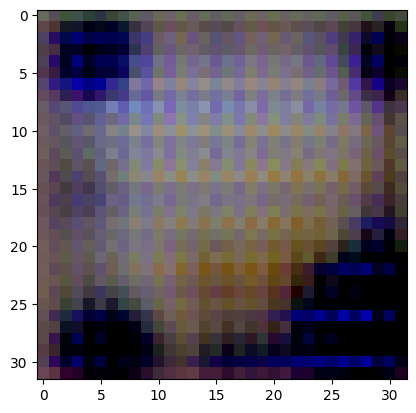

2/2 [==============================] - 0s 204ms/step


>1, 81/390, d1=1.378, d2=0.143 g=2.180


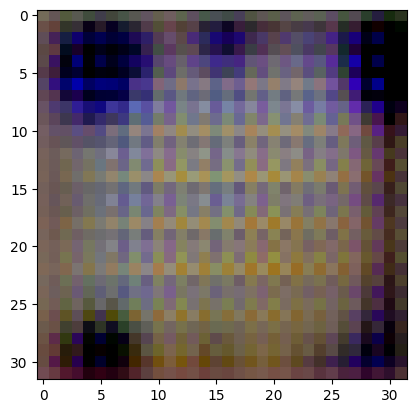

2/2 [==============================] - 0s 205ms/step


>1, 82/390, d1=0.913, d2=0.389 g=1.508


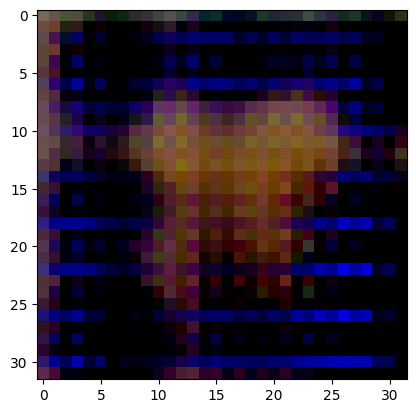

2/2 [==============================] - 0s 203ms/step


>1, 83/390, d1=0.362, d2=0.571 g=1.792


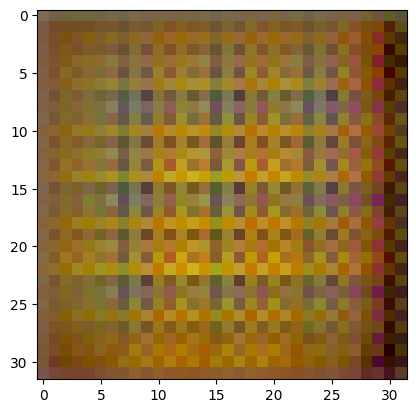

2/2 [==============================] - 1s 338ms/step


>1, 84/390, d1=0.280, d2=0.261 g=2.362


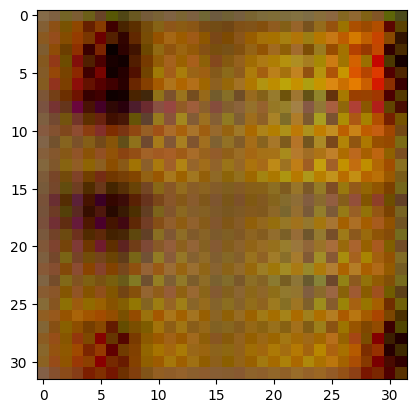

2/2 [==============================] - 0s 204ms/step


>1, 85/390, d1=0.350, d2=0.233 g=2.614


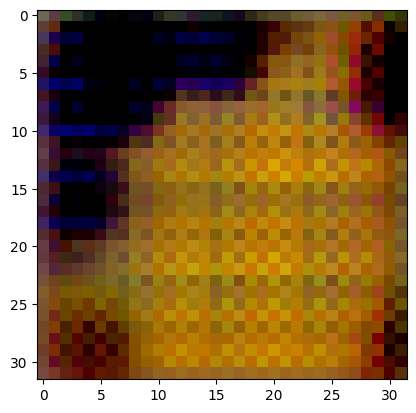

2/2 [==============================] - 0s 209ms/step


>1, 86/390, d1=0.347, d2=0.327 g=2.780


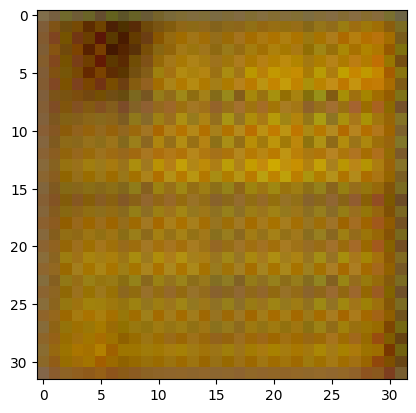

2/2 [==============================] - 0s 209ms/step


>1, 87/390, d1=0.482, d2=0.224 g=2.803


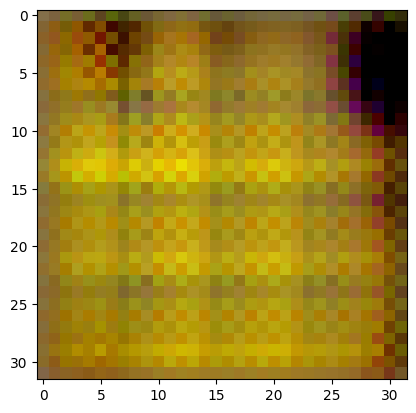

2/2 [==============================] - 0s 222ms/step


>1, 88/390, d1=0.355, d2=0.357 g=3.253


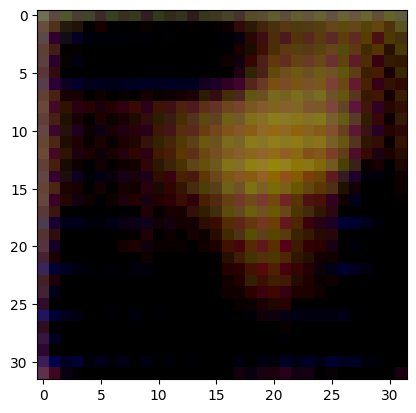

2/2 [==============================] - 0s 210ms/step


>1, 89/390, d1=0.517, d2=0.245 g=2.578


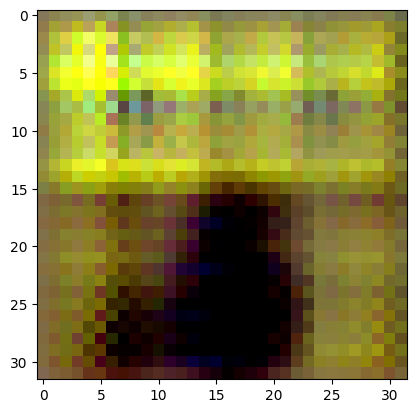

2/2 [==============================] - 0s 206ms/step


>1, 90/390, d1=0.358, d2=0.874 g=2.358


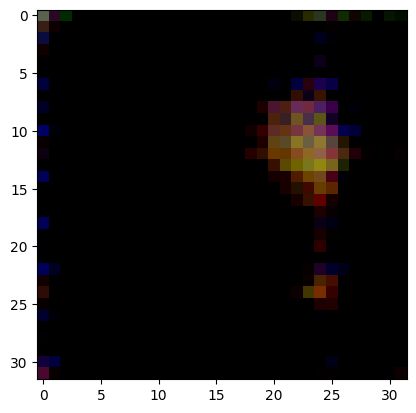

2/2 [==============================] - 0s 212ms/step


>1, 91/390, d1=0.625, d2=0.316 g=2.023


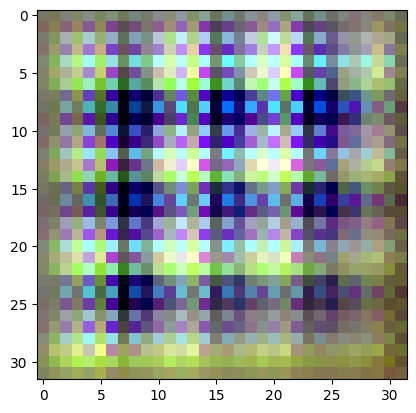

2/2 [==============================] - 1s 385ms/step


>1, 92/390, d1=0.713, d2=0.491 g=1.814


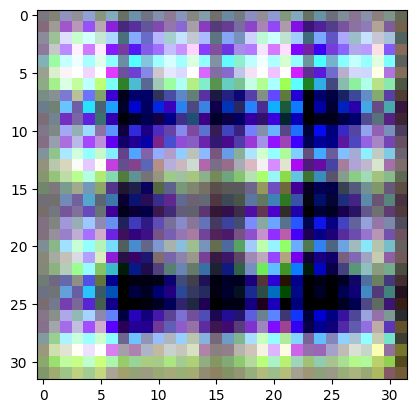

2/2 [==============================] - 0s 225ms/step


>1, 93/390, d1=0.563, d2=0.424 g=1.870


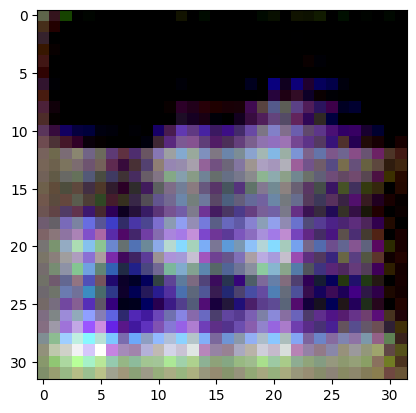

2/2 [==============================] - 0s 200ms/step


>1, 94/390, d1=0.598, d2=0.510 g=1.979


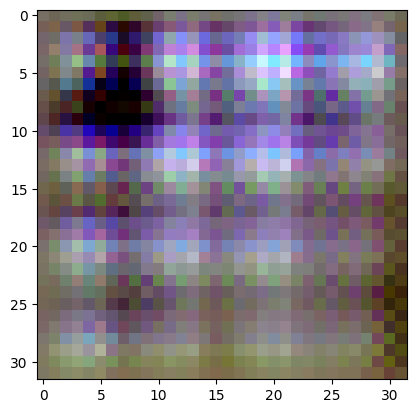

2/2 [==============================] - 0s 211ms/step


>1, 95/390, d1=0.632, d2=0.376 g=1.676


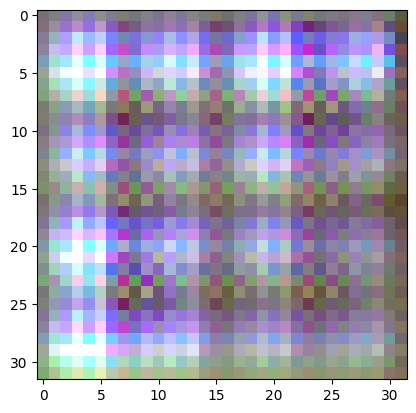

2/2 [==============================] - 0s 221ms/step


>1, 96/390, d1=0.548, d2=0.704 g=1.556


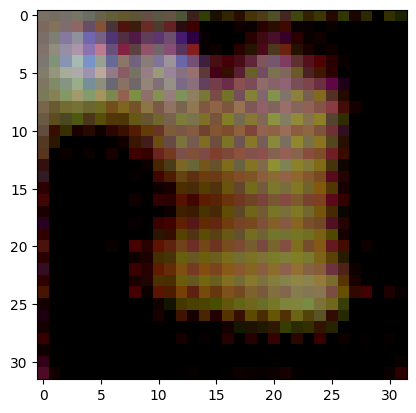

2/2 [==============================] - 1s 299ms/step


>1, 97/390, d1=0.576, d2=0.519 g=1.606


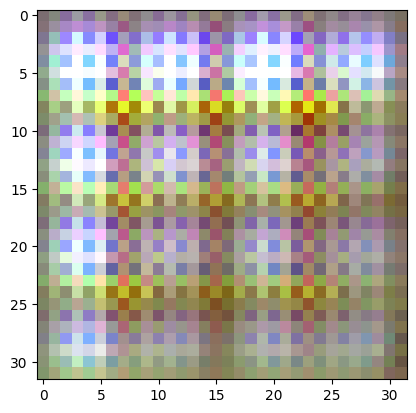

2/2 [==============================] - 0s 208ms/step


>1, 98/390, d1=0.473, d2=0.578 g=1.665


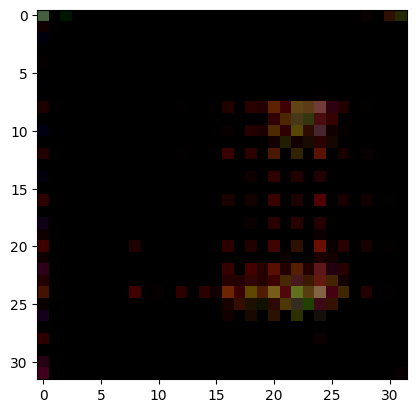

2/2 [==============================] - 0s 209ms/step


>1, 99/390, d1=0.634, d2=0.554 g=1.394


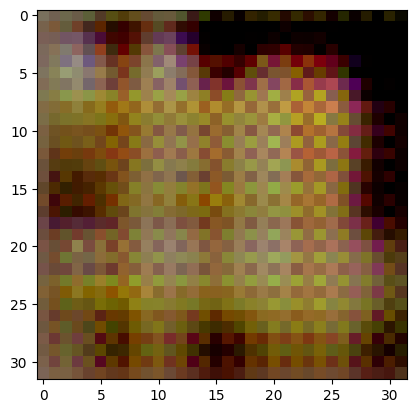

2/2 [==============================] - 1s 330ms/step


>1, 100/390, d1=0.443, d2=0.552 g=1.502


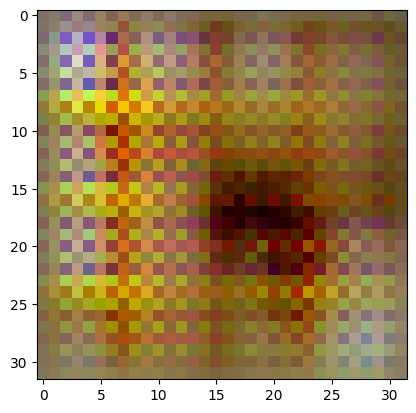

2/2 [==============================] - 0s 203ms/step


>1, 101/390, d1=0.429, d2=0.414 g=1.774


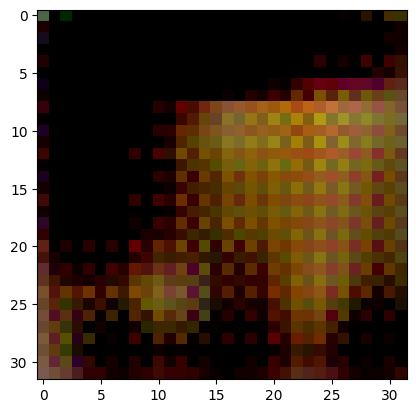

2/2 [==============================] - 0s 215ms/step


>1, 102/390, d1=0.408, d2=0.292 g=1.991


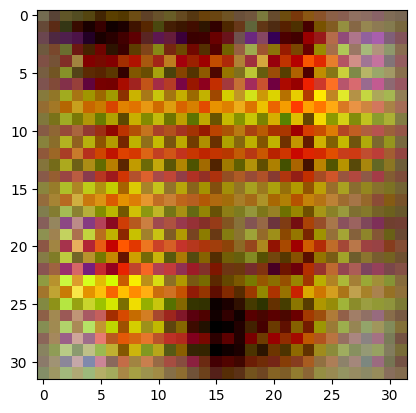

2/2 [==============================] - 0s 209ms/step


>1, 103/390, d1=0.549, d2=0.295 g=1.890


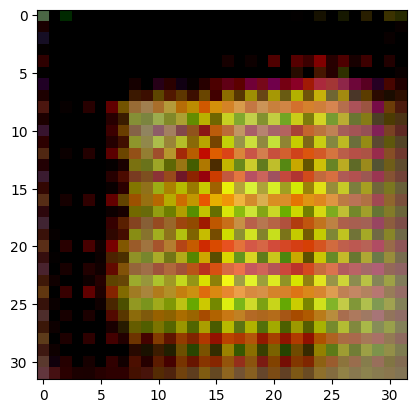

2/2 [==============================] - 0s 218ms/step


>1, 104/390, d1=0.431, d2=0.711 g=1.823


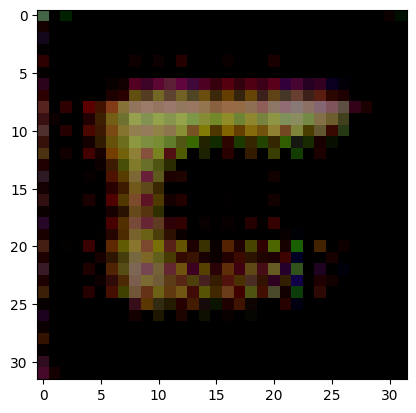

2/2 [==============================] - 1s 307ms/step


>1, 105/390, d1=0.547, d2=1.192 g=2.788


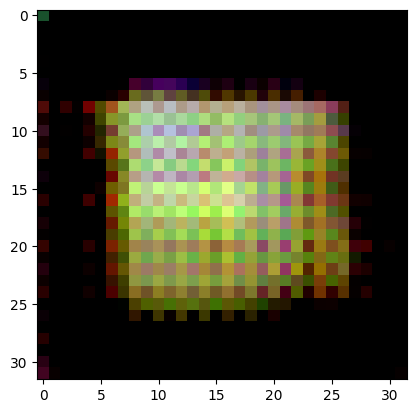

2/2 [==============================] - 0s 206ms/step


>1, 106/390, d1=1.737, d2=0.309 g=1.540


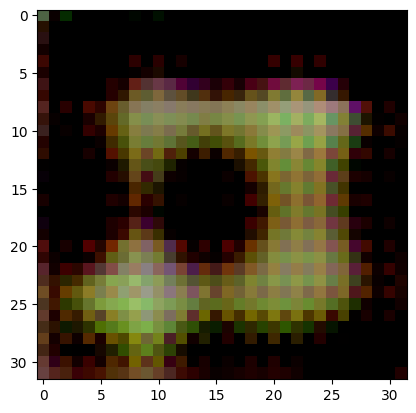

2/2 [==============================] - 1s 339ms/step


>1, 107/390, d1=0.591, d2=0.442 g=1.482


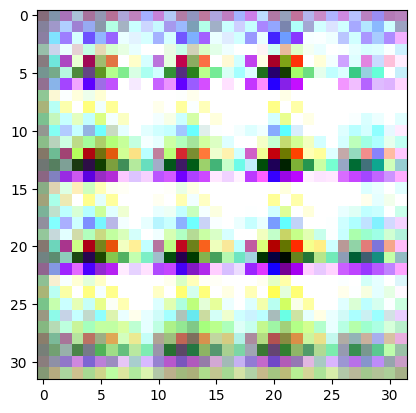

2/2 [==============================] - 0s 221ms/step


>1, 108/390, d1=0.457, d2=0.356 g=1.551


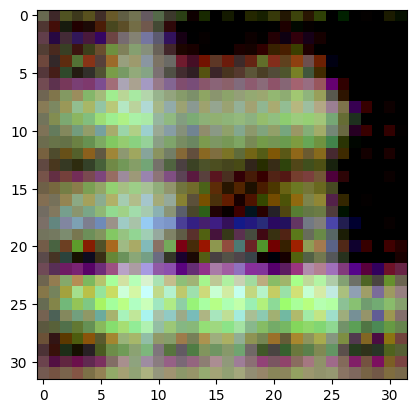

2/2 [==============================] - 0s 207ms/step


>1, 109/390, d1=0.491, d2=0.460 g=1.506


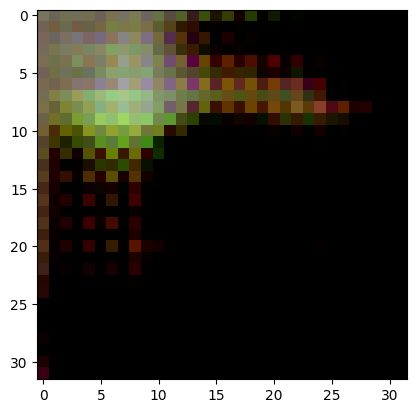

2/2 [==============================] - 1s 286ms/step


>1, 110/390, d1=0.558, d2=0.501 g=1.545


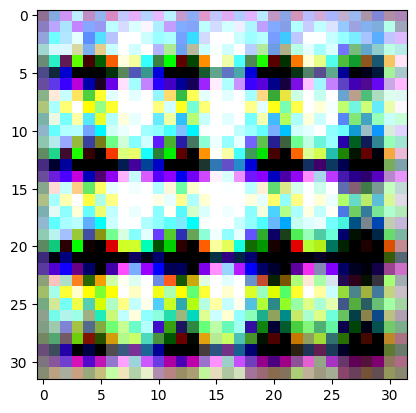

2/2 [==============================] - 0s 207ms/step


>1, 111/390, d1=0.642, d2=0.539 g=1.532


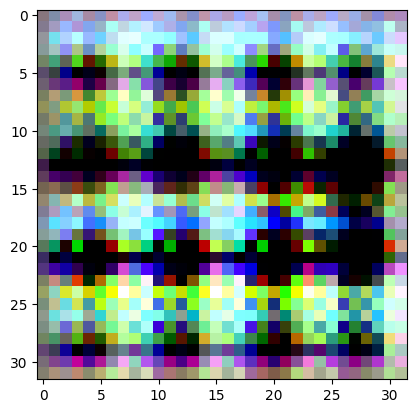

2/2 [==============================] - 0s 212ms/step


>1, 112/390, d1=0.538, d2=0.405 g=1.797


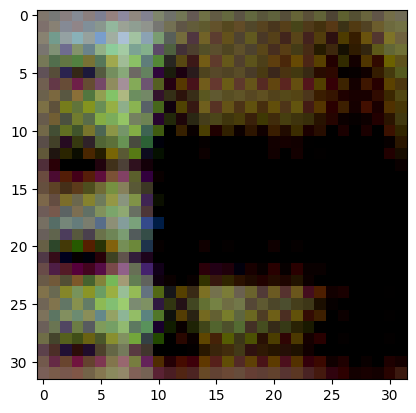

2/2 [==============================] - 0s 206ms/step


>1, 113/390, d1=0.399, d2=0.418 g=2.196


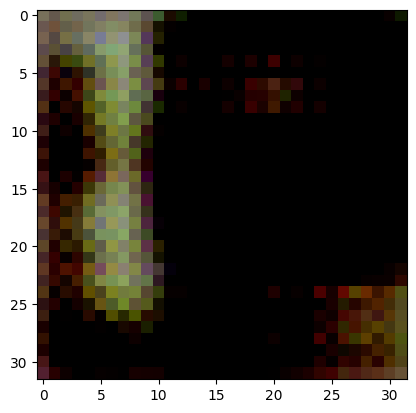

2/2 [==============================] - 0s 216ms/step


>1, 114/390, d1=0.643, d2=0.475 g=1.987


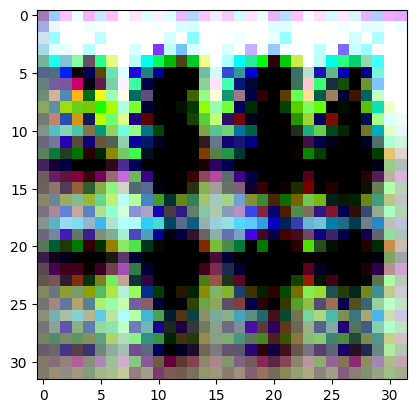

2/2 [==============================] - 1s 302ms/step


>1, 115/390, d1=0.551, d2=0.475 g=1.577


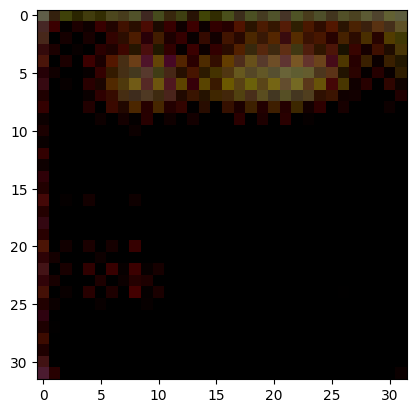

2/2 [==============================] - 0s 212ms/step


>1, 116/390, d1=0.526, d2=0.706 g=1.385


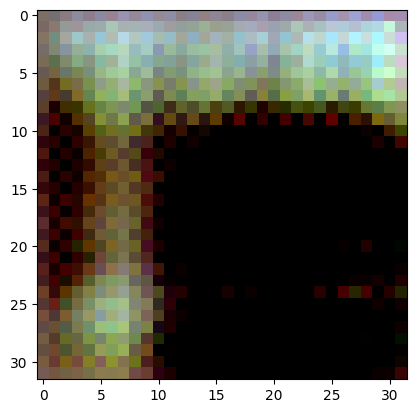

2/2 [==============================] - 0s 206ms/step


>1, 117/390, d1=0.519, d2=0.738 g=1.302


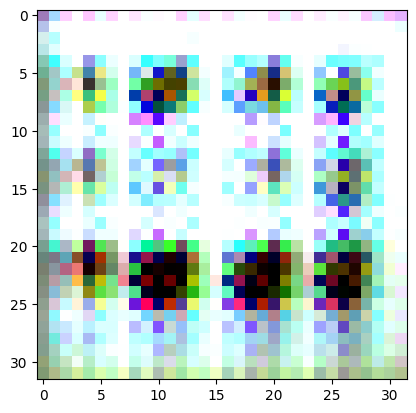

2/2 [==============================] - 1s 244ms/step


>1, 118/390, d1=0.658, d2=0.490 g=1.233


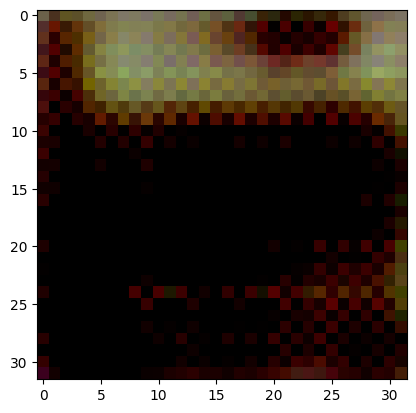

2/2 [==============================] - 1s 319ms/step


>1, 119/390, d1=0.575, d2=0.647 g=1.210


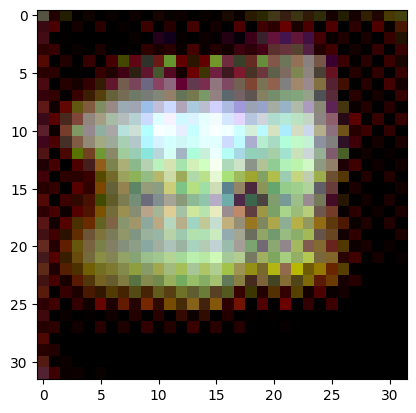

2/2 [==============================] - 1s 307ms/step


>1, 120/390, d1=0.576, d2=0.536 g=1.217


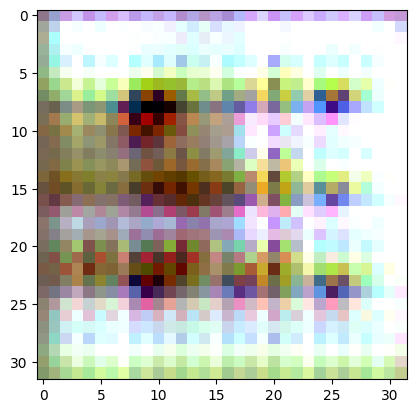

2/2 [==============================] - 0s 226ms/step


>1, 121/390, d1=0.613, d2=0.623 g=1.120


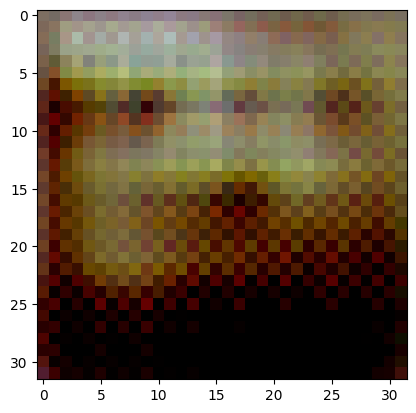

2/2 [==============================] - 0s 214ms/step


>1, 122/390, d1=0.609, d2=0.720 g=1.279


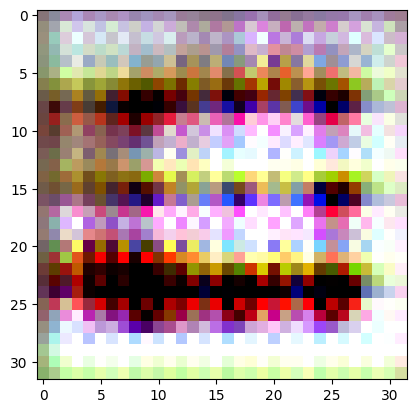

2/2 [==============================] - 1s 323ms/step


>1, 123/390, d1=0.616, d2=0.504 g=1.572


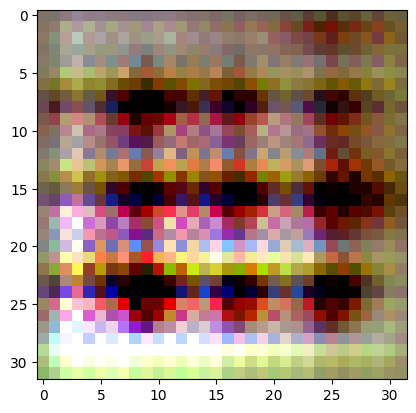

2/2 [==============================] - 0s 207ms/step


In [ ]:
# example of a dcgan on cifar10
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	# normal
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 4x4 image
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	# upsample to 8x8
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 32x32
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# output layer
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load and prepare cifar10 training images
def load_real_samples():
	# load cifar10 dataset
	(trainX, trainY), (_, _) = load_data()

  frogX =[]
  for img, label in zip(trainX, trainY):
    if label == 6: # frog

	# convert from unsigned ints to floats
  X = np.array(frogX)
	X = trainX.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return X

# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i])
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch+1)
	g_model.save(filename)

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
			pyplot.imshow(X_fake[0]+ 1 / 2); pyplot.show()
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 32, 32, 3)         1466115   
                                                                 
 sequential_15 (Sequential)  (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


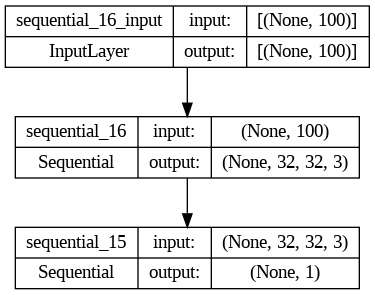

In [49]:

# demonstrate creating the three models in the gan
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model

# define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	# normal
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 4x4 image
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	# upsample to 8x8
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 32x32
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# output layer
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)